In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('train/train2_checkins_Alaska.csv')
len(df)

1203

In [23]:
df['y'].max()

# df['t'].max()

152

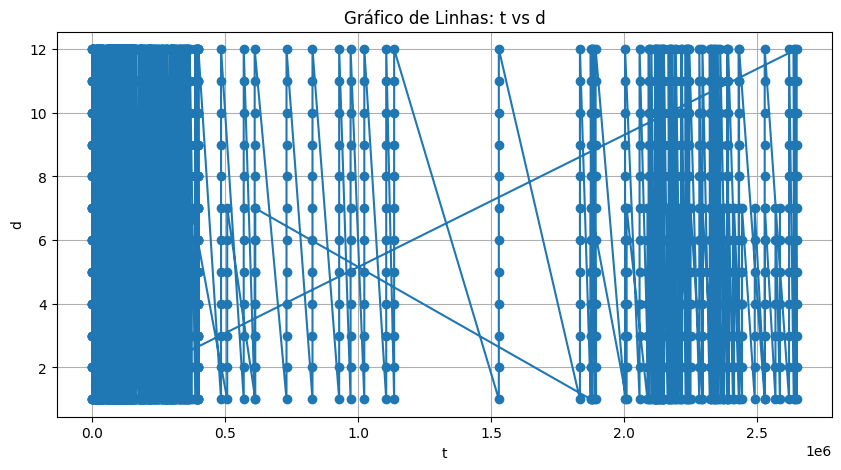

In [4]:
# Gráfico de Linhas: t vs d
plt.figure(figsize=(10, 5))
plt.plot(df['uid'], df['d'], marker='o', linestyle='-')
plt.xlabel('t')
plt.ylabel('d')
plt.title('Gráfico de Linhas: t vs d')
plt.grid(True)
plt.show()

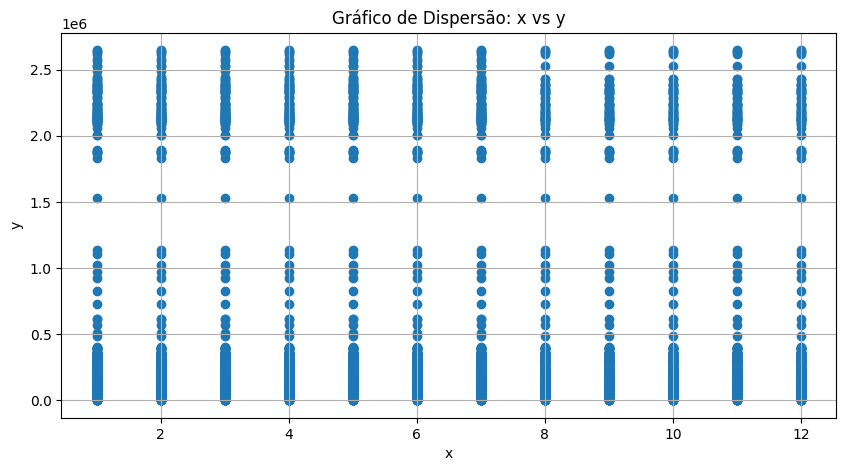

In [5]:
# Gráfico de Dispersão: x vs y
plt.figure(figsize=(10, 5))
plt.scatter(df['d'], df['uid'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de Dispersão: x vs y')
plt.grid(True)
plt.show()

In [6]:
# Contar usuários únicos para cada valor de 'd'
unique_users_per_d = df.groupby('d')['uid'].nunique()

# Encontrar o valor de 'd' que maximiza a quantidade de usuários únicos
max_d = unique_users_per_d.idxmax()
max_users = unique_users_per_d.max()

print(f'O valor de d que maximiza a quantidade de usuários únicos é {max_d} com {max_users} usuários únicos.')


O valor de d que maximiza a quantidade de usuários únicos é 2 com 451 usuários únicos.


In [7]:
# Contar usuários únicos para cada valor de 'd'
unique_users_per_d = df.groupby('d')['uid'].nunique()

# Exibir a contagem
print(unique_users_per_d)


d
1     450
2     451
3     450
4     450
5     449
6     451
7     450
8     337
9     337
10    337
11    337
12    337
Name: uid, dtype: int64


In [8]:
# Para cada usuário, obter o dia máximo
max_d_per_user = df.groupby('uid')['d'].max().reset_index()

# Contar quantos usuários têm cada dia como seu dia máximo
unique_users_per_max_d = max_d_per_user['d'].value_counts().sort_index()

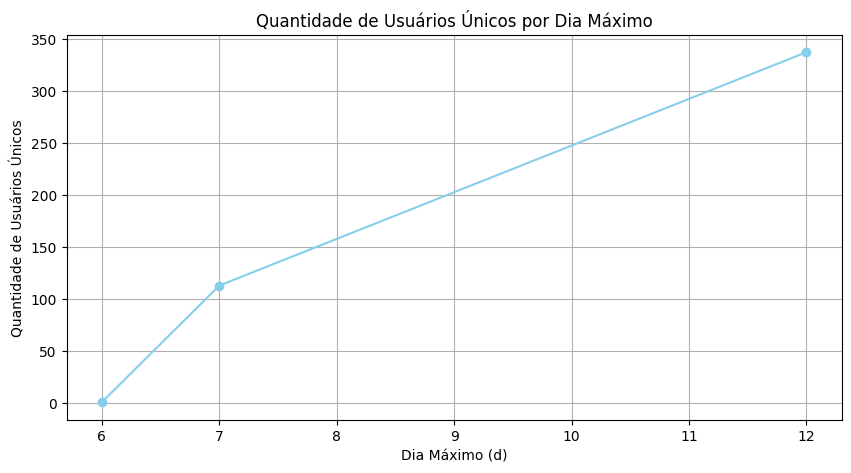

In [9]:
plt.figure(figsize=(10, 5))
unique_users_per_max_d.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Dia Máximo (d)')
plt.ylabel('Quantidade de Usuários Únicos')
plt.title('Quantidade de Usuários Únicos por Dia Máximo')
plt.xticks(rotation=0)
plt.grid()

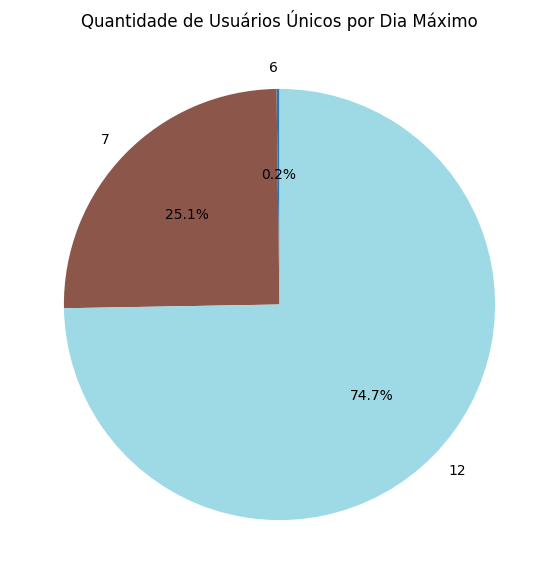

In [10]:
# Plotar o gráfico de pizza
plt.figure(figsize=(10, 7))
unique_users_per_max_d.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.ylabel('')
plt.title('Quantidade de Usuários Únicos por Dia Máximo')

# Exibir o gráfico
plt.show()


In [11]:
num_nunique = df['uid'].nunique()
print(num_nunique)

451


In [12]:
count = df.groupby('uid').size().reset_index(name='counts')
count_sorted = count.sort_values(by='counts', ascending=False)
# count = count_sorted['counts'] > 120
# # Imprimir o resultado
print(count_sorted)
# # Contar o número de registros por usuário
# count = df.groupby('uid').size().reset_index(name='counts')

# # Filtrar os usuários que têm no máximo 200 registros
# filtered_uids = count.query('counts <= 200')['uid']

# # Fazer merge com o DataFrame original para obter apenas os dados filtrados
# filtered_df = df[df['uid'].isin(filtered_uids)]

# # Imprimir o resultado
# print(filtered_uids)

        uid  counts
225  164613      12
253  210889      12
278  250814      12
276  247649      12
275  246526      12
..      ...     ...
335  361333       7
78    67162       7
77    67021       7
0       395       7
23    19657       2

[451 rows x 2 columns]


In [13]:
df = pd.read_csv('test/test_checkins_Nebraska.csv')
len(df)

8617

In [14]:
df = pd.read_csv('test/test2_checkins_Alaska.csv')
df.describe()
df2 = df.sample(3000)
df3 = df.sample(3000)
df['d'].max()
# df['t'].max()

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
df = pd.read_csv('train/train2_checkins_Nebraska.csv')
df.describe()
df2 = df.sample(3000)
df3 = df.sample(3000)
df['d'].max()

93

In [ ]:
df2 = df2.sort_values(by=['uid', 'd', 't'])
df2.to_csv("./train/sample_train_Alaska.csv")

In [ ]:
df3 = df3.sort_values(by=['uid', 'd', 't'])
df3.to_csv("./test/sample_test_Alaska.csv")

In [ ]:
sampledf = pd.read_csv("train/sample_train_Alaska.csv")
sampledf.describe()

,Unnamed: 0,uid,t,d,x,y
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,2878.045667,5.851957e+05,18.107667,5.433667,109.519333,41.626000
std,1669.239878,8.182638e+05,14.335035,4.052622,32.877418,11.615784
min,1.000000,1.890000e+02,0.000000,1.000000,3.000000,8.000000
25%,1425.750000,7.326600e+04,5.000000,2.000000,95.000000,41.000000
50%,2892.500000,2.226950e+05,18.000000,4.000000,96.000000,41.000000
75%,4315.500000,4.009600e+05,29.000000,8.000000,107.000000,42.000000
max,5778.000000,2.676824e+06,45.000000,15.000000,199.000000,93.000000
